In [1]:
import sys
sys.path.append('/home/campbell/yulee/DAMM/new/code/pro')

from funcs2 import *

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
plt.rcParams['figure.figsize'] = [20, 10]

In [31]:
#cohort = 'basel'
cohort = 'eddy'
ss = 10

In [32]:
if cohort == 'eddy':

    analysisProteins = ['B220', 'CCR7', 'CD11b', 'CD11c', 'CD19', 'CD28', 'CD3', 'CD31', 'CD4',
           'CD45', 'CD49b', 'CD68', 'CD73', 'CD8', 'CTLA4', 'DNA1', 'DNA3',
           'Epithelium', 'FOXP3', 'GATA3', 'GFP', 'GranzymeB', 'HA', 'ICOS',
           'IL7Ra', 'Ly6G', 'MHCII', 'PD1', 'PDL1', 'PNAd', 'Perforin', 'RFP',
           'S100A8-9', 'Stroma', 'TBET', 'TCF1', 'YAP', 'iNOS']

    pretty_printing = ['B220', 'CCR7', 'CD11b', 'CD11c', 'CD19', 'CD28', 'CD3', 'CD31', 'CD4',
           'CD45', 'CD49b', 'CD68', 'CD73', 'CD8', 'CTLA4', 'DNA1', 'DNA3',
           'Epithelium', 'FOXP3', 'GATA3', 'GFP', 'GranzymeB', 'HA', 'ICOS',
           'IL7Ra', 'Ly6G', 'MHCII', 'PD1', 'PDL1', 'PNAd', 'Perforin', 'RFP',
           'S100A8-9', 'Stroma', 'TBET', 'TCF1', 'YAP', 'iNOS', 'size']
else:
    analysisProteins = ['CD20', 'CD3', 'CD44', 'CD45', 'CD68', 'Carbonic_Anhydrase_IX',
       'Cytokeratin19', 'Cytokeratin5', 'Cytokeratin7', 'Cytokeratin8/18',
       'DNA1', 'DNA2', 'EGFR', 'Ecadherin', 'EpCAM', 'Erk1/2', 'Fibronectin',
       'GATA3', 'H3K27me3', 'Keratin14', 'Ki67', 'Progesterone_Receptor_A/B',
       'RabbitIgGHL', 'S6', 'SMA', 'Slug', 'Sox9', 'TotalHH3', 'Twist', 
       'Vimentin', 'bCatenin', 'cMyc', 'cerbB2_Her2', 'cleavedPARP_CleavedCaspase3',
       'mTOR', 'p53', 'panCytokeratin/Keratin_Epithelial', 'phospho_HH3', 'vWF_CD31']

    pretty_printing = ['CD20', 'CD3', 'CD44', 'CD45', 'CD68', 'CAIX', 
                    'CK19', 'CK5', 'CK7', 'CK8/18', 
                    'DNA1', 'DNA2', 'EGFR', 'ECadherin', 'EpCAM', 'Erk', 'Fibronectin', 
                    'GATA3', 'H3K27me3', 'CK14', 'Ki67', 'PR', 
                    'Estroge', 'S6', 'SMA', 'Slug', 'Sox9', 'TotHH3', 'Twist',
                    'Vimentin', 'bCatenin', 'cMyc', 'Her2', 'cleavedPARP', 
                    'mTOR', 'p53', 'panCK', 'phosHH3', 'vWF', 'size'] 

#tr_exp = sc.read_h5ad('/home/campbell/yulee/DAMM/new/data/{}/{}k/tr_exp.h5ad'.format(cohort, ss))
#te_exp = sc.read_h5ad('/home/campbell/yulee/DAMM/new/data/{}/{}k/te_exp.h5ad'.format(cohort, ss))

tr_exp = sc.read_h5ad('/home/campbell/yulee/DAMM/new/data/{}/{}_exp.h5ad'.format(cohort, cohort))
#te_exp = sc.read_h5ad('/home/campbell/yulee/DAMM/new/data/{}/{}_exp.h5ad'.format(cohort, cohort))

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [33]:
thresholds = pd.DataFrame(np.quantile(tr_exp[:,analysisProteins].X, [0.25, 0.75], axis=0), columns = pretty_printing[:-1])

In [34]:
thresholds

,B220,CCR7,CD11b,CD11c,CD19,CD28,CD3,CD31,CD4,CD45,...,PDL1,PNAd,Perforin,RFP,S100A8-9,Stroma,TBET,TCF1,YAP,iNOS
0,0.375000,1.690476,1.342857,0.208333,0.166667,0.333333,2.243243,1.365079,0.033333,0.571429,...,0.685185,0.191489,0.090909,1.315789,0.068182,3.076923,0.200000,4.036397,0.351351,0.142857
1,3.647059,4.321883,2.620690,0.800000,0.642857,0.789474,12.405649,1.870968,0.166667,0.866667,...,2.833333,0.375000,0.226415,5.166667,0.180000,7.031130,0.588235,8.454190,0.849315,0.323529


In [28]:
#mat = pd.DataFrame(trY, columns = pretty_printing[:-1])

if cohort == 'eddy':
    pheno_fn = '/home/campbell/yulee/DAMM/new/res/{}/{}k/model2/phenoYS_center_pn30_8.csv'.format(cohort, ss)
    #kms_fn = '/home/campbell/yulee/DAMM/new/res/{}/{}k/model/kms_center_nc17_student_rv1000_soNone_rr0_0.csv'.format(cohort, ss)
    damm_fn = '/home/campbell/yulee/DAMM/new/res/{}/{}k/model3/damm_center_nc15_student_rv1000.0_soNone_rr1_cs0_0.csv'.format(cohort, ss)
else:
    pheno_fn = '/home/campbell/yulee/DAMM/new/res/{}/{}k/model2/phenoYS_center_pn30_6.csv'.format(cohort, ss)
    #kms_fn = '/home/campbell/yulee/DAMM/new/res/{}/{}k/model/kms_center_nc20_student_rv1000_soNone_rr0_0.csv'.format(cohort, ss)
    damm_fn = '/home/campbell/yulee/DAMM/new/res/{}/{}k/model3/damm_center_nc20_student_rv1000.0_soNone_rr1_cs0_0.csv'.format(cohort, ss)

In [29]:
pheno_mat = pd.read_csv(pheno_fn, index_col=0)
#kms_mat = pd.read_csv(kms_fn, index_col=0)
damm_mat = pd.read_csv(damm_fn, index_col=0)

In [20]:
damm_mat

,B220,CCR7,CD11b,CD11c,CD19,CD28,CD3,CD31,CD4,CD45,...,PNAd,Perforin,RFP,S100A8-9,Stroma,TBET,TCF1,YAP,iNOS,size
0,0.451125,2.545242,1.233492,0.233635,0.123495,0.411408,2.459038,1.521122,0.040264,0.730893,...,0.216690,0.088715,1.164371,0.069429,2.800403,0.189489,6.469702,0.262275,0.149363,24.032132
1,0.406654,4.568149,1.714734,0.381322,0.247746,0.815423,14.963382,1.548553,0.194808,0.747963,...,0.276861,0.221106,5.286547,0.136549,6.345306,0.388206,9.172090,0.645952,0.325308,29.119296
2,6.620262,0.733561,1.699186,0.193283,0.881037,0.177367,1.296919,1.567464,0.029073,0.557770,...,0.228533,0.085740,1.089525,0.084741,2.729235,0.206279,1.721484,0.541108,0.128291,27.064538
3,1.146555,2.275835,2.527318,0.731716,0.190283,0.405678,2.298510,1.612411,0.042466,0.680445,...,0.206677,0.104362,1.406325,0.115395,3.962198,0.245712,4.663901,0.382100,0.155862,26.741682
4,1.111252,3.173780,2.755820,0.483675,0.242114,0.595241,3.073550,1.973728,0.061025,0.911807,...,0.276172,0.136904,1.707675,0.139130,4.363981,0.314264,6.523740,0.533382,0.220002,26.451921
5,0.363212,2.862053,1.155020,0.268935,0.223536,0.579565,12.331128,1.214986,0.111039,0.575016,...,0.245338,0.158114,3.759798,0.093626,4.190331,0.274465,7.400114,0.525883,0.232111,23.905852
6,0.797804,5.350714,2.712678,0.661564,0.365402,1.030875,18.061490,1.913696,0.208973,0.933268,...,0.402174,0.301205,6.692581,0.186671,7.947882,0.688165,9.866037,0.908479,0.415980,29.064118
7,8.227557,0.981158,1.606814,0.330129,2.120772,0.357914,4.514668,1.408712,0.092725,0.583040,...,0.456259,0.178850,4.623184,0.093740,5.000835,0.461308,1.607760,1.038378,0.228706,34.503940
8,0.590505,4.701387,2.230213,0.983358,0.365006,0.894614,9.597325,1.535985,0.181798,0.586852,...,0.289912,0.216082,6.108847,0.175409,11.923774,0.653282,5.393462,0.800867,0.335215,23.942039
9,2.001410,2.631310,1.621064,0.868526,0.504917,0.681933,11.959242,1.372184,0.123966,0.530690,...,0.320677,0.163145,5.070320,0.142251,8.200075,0.376079,7.090639,0.759591,0.243418,39.736638


In [ ]:
'''
## version 1
x = np.array(mat['CD45']); y = np.array(mat['CD4'])

## case 1: bottom right
bot_right = sum((x > thresholds['CD45'][1]) & (y < thresholds['CD4'][0]))

## case 2: top left
top_left = sum((x < thresholds['CD45'][0]) & (y > thresholds['CD4'][1]))

## case 3: bottom left
bot_left = sum((x < thresholds['CD45'][0]) & (y < thresholds['CD4'][0]))

## case 4: top left
top_right = sum((x > thresholds['CD45'][1]) & (y > thresholds['CD4'][1]))

## negative case:
neg_score = (bot_right + top_left)/len(x)

## postive case:
pos_score = (bot_left + top_right)/len(x)
'''

In [15]:
if cohort == 'eddy':
    pairs = [
        ['CD4','CD8'],
        ['CD4','CD11b'],
        ['CD4','CD19'],
        ['CD4','CD28'],
        ['CD4','CD45'],
        ['CD4','CD68'],
        
        ['CD8','CD11b'],
        ['CD8','CD19'],
        ['CD8','CD28'],
        ['CD8','CD45'],
        ['CD8','CD68'],
        
        ['CD31','CD3'],
        ['CD31','CD4'],
        ['CD31','CD8'],
        ['CD31','CD11b'],        
        ['CD31','CD11c'],        
        ['CD31','CD19'],
        ['CD31','CD28'],
        ['CD31','CD45'],
        ['CD31','CD49b'],
        ['CD31','CD68'],
        ['CD31','CD73'],
        ['CD31', 'Stroma'],

        ['CD45','CD11b'],
        ['CD45','CD19'],
        ['CD45','CD28'],
        ['CD45','CD68']
    ]
    
        #['Stroma','Epithelium'],
    
        #['Epithelium','CD4'],
        #['Epithelium','CD8'],
        #['Epithelium','CD11b'],
        #['Epithelium','CD31'],
        #['Epithelium','CD19'],
        #['Epithelium','CD45']]
else:
    pairs = [['CD3','CD20'],
        ['CD3','CD68'],
        ['Vimentin','ECadherin'],
        ['Vimentin','Fibronectin'],
        ['EpCAM','ECadherin'],
        ['EpCAM','panCK'],
        ['ECadherin','CD68']]

In [ ]:
out = []
for pair in pairs:
    
    x_name = pair[0]; y_name = pair[1]
    #x = np.array(pheno_mat[x_name]); y = np.array(pheno_mat[y_name])
    #x = np.array(damm_mat[x_name]); y = np.array(damm_mat[y_name])
    x = np.array(mat[x_name]); y = np.array(mat[y_name])

    ## case 1: bottom right
    bot_right = sum((x > thresholds[x_name][1]) & (y < thresholds[y_name][0]))

    ## case 2: top left
    top_left = sum((x < thresholds[x_name][0]) & (y > thresholds[y_name][1]))

    ## case 3: bottom left
    bot_left = sum((x < thresholds[x_name][0]) & (y < thresholds[y_name][0]))

    ## case 4: top left
    top_right = sum((x > thresholds[x_name][1]) & (y > thresholds[y_name][1]))
    
    ## negative case:
    neg_score = (bot_right + top_left)/len(x)

    ## postive case:
    pos_score = (bot_left + top_right)/len(x)
    
    print("{}_{} -- neg: {}; pos: {}".format(x_name, y_name, neg_score, pos_score))
    
    out.append([x_name + '_' + y_name, neg_score, pos_score])
    
    '''
    plt.scatter(x, y)
    plt.axvline(x=thresholds[x_name][0], color='r')
    plt.axvline(x=thresholds[x_name][1], color='r')    
    plt.axhline(y=thresholds[y_name][0], color='r')
    plt.axhline(y=thresholds[y_name][1], color='r')
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()
    '''

In [13]:
def newMetric(mat, pairs, thresholds):
    out = []
    for pair in pairs:

        x_name = pair[0]; y_name = pair[1]
        #x = np.array(pheno_mat[x_name]); y = np.array(pheno_mat[y_name])
        #x = np.array(damm_mat[x_name]); y = np.array(damm_mat[y_name])
        x = np.array(mat[x_name]); y = np.array(mat[y_name])

        ## case 1: bottom right
        bot_right = sum((x > thresholds[x_name][1]) & (y < thresholds[y_name][0]))

        ## case 2: top left
        top_left = sum((x < thresholds[x_name][0]) & (y > thresholds[y_name][1]))

        ## case 3: bottom left
        bot_left = sum((x < thresholds[x_name][0]) & (y < thresholds[y_name][0]))

        ## case 4: top left
        top_right = sum((x > thresholds[x_name][1]) & (y > thresholds[y_name][1]))

        ## negative case:
        neg_score = (bot_right + top_left)/len(x)

        ## postive case:
        pos_score = (bot_left + top_right)/len(x)

        print("{}_{} -- neg: {}; pos: {}".format(x_name, y_name, neg_score, pos_score))

        out.append([x_name + '_' + y_name, neg_score, pos_score])

        '''
        plt.scatter(x, y)
        plt.axvline(x=thresholds[x_name][0], color='r')
        plt.axvline(x=thresholds[x_name][1], color='r')    
        plt.axhline(y=thresholds[y_name][0], color='r')
        plt.axhline(y=thresholds[y_name][1], color='r')
        plt.xlabel(x_name)
        plt.ylabel(y_name)
        plt.show()
        '''
    return pd.DataFrame(out, columns = ['pair', 'neg', 'pos'])

In [ ]:
pheno_res = newMetric(pheno_mat, pairs, thresholds)
damm_res = newMetric(damm_mat, pairs, thresholds)

In [62]:
neg = pd.concat([pheno_res, pd.Series(np.zeros(pheno_res.shape[0]))], axis=1)
pos = pd.concat([damm_res, pd.Series(np.ones(pheno_res.shape[0]))], axis=1)
df = pd.concat([neg, pos])
df.columns = ['pair', 'PhenoGraph', 'DAMM', 'type']

Text(0.5, 0.98, 'Correlation Alternative')

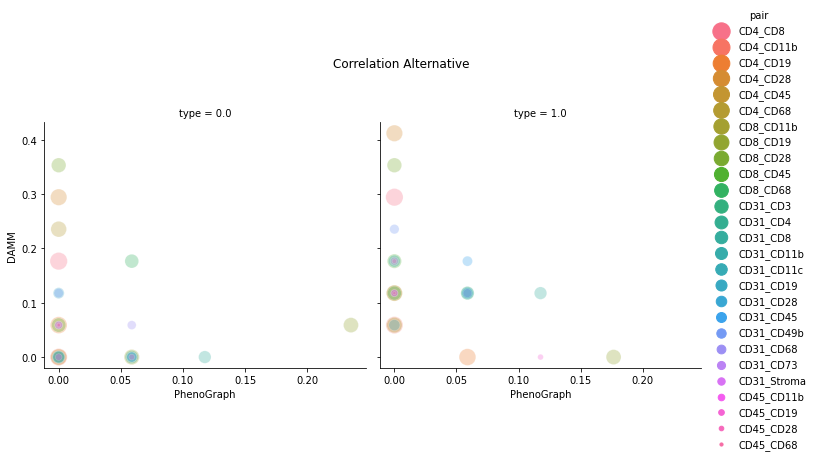

In [96]:
rel = sns.relplot(data=df, x='PhenoGraph', y='DAMM', col='type', hue='pair', size="pair", sizes=(10, 300), alpha = 0.3)
#rel = sns.relplot(data=df, x='PhenoGraph', y='DAMM', col='type', hue='pair')
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle('Correlation Alternative')

In [ ]:
'''
## version 2
x = np.array(damm_mat['CD45']); y = np.array(damm_mat['CD4'])

## case 1: positive
pos = sum((x > thresholds['CD45'][1]) | (y < thresholds['CD4'][0]))/len(x)

## case 2: negative
neg = sum((x < thresholds['CD45'][0]) | (y < thresholds['CD4'][0]))/len(x)
'''

In [ ]:
out = []
for pair in pairs:
    
    x_name = pair[0]; y_name = pair[1]
    #x = np.array(pheno_mat[x_name]); y = np.array(pheno_mat[y_name])
    x = np.array(damm_mat[x_name]); y = np.array(damm_mat[y_name])
    
    ## case 1: negative
    neg_score = sum((x < thresholds[x_name][0]) | (y < thresholds[y_name][0]))/len(x)

    ## case 2: positive
    pos_score = sum((x > thresholds[x_name][1]) | (y < thresholds[y_name][0]))/len(x)

    print("{}_{} -- neg: {}; pos: {}".format(x_name, y_name, neg_score, pos_score))
    
    out.append([x_name + '_' + y_name, neg_score, pos_score])
    
    plt.scatter(x, y)
    plt.axvline(x=thresholds[x_name][0], color='r')
    plt.axvline(x=thresholds[x_name][1], color='r')    
    plt.axhline(y=thresholds[y_name][0], color='r')
    plt.axhline(y=thresholds[y_name][1], color='r')
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()


In [62]:
damm_mat

,CD20,CD3,CD44,CD45,CD68,CAIX,CK19,CK5,CK7,CK8/18,...,bCatenin,cMyc,Her2,cleavedPARP,mTOR,p53,panCK,phosHH3,vWF,size
0,0.067296,0.085376,16.609565,0.107377,0.292750,0.358896,0.172181,0.074825,0.036148,0.115449,...,0.092655,0.267080,0.415540,0.465280,0.453445,0.058122,0.112932,0.191182,0.079819,77.687649
1,0.105552,0.064837,9.871456,0.103223,0.167601,0.720701,0.810661,0.115108,0.192935,2.041230,...,0.180533,0.310932,1.714589,1.039211,1.041498,0.091294,17.154820,0.210491,0.113846,92.022817
2,0.057086,0.036967,9.952753,0.058735,0.115030,0.400665,0.399128,0.088398,0.108097,0.644964,...,0.107456,0.180775,1.012292,0.605388,0.578182,0.056866,6.661704,0.148261,0.066291,73.564194
3,0.032277,0.041159,8.695856,0.062901,0.109622,0.179191,0.122565,0.063385,0.018449,0.083039,...,0.048650,0.113468,0.182584,0.251624,0.243534,0.031837,0.142174,0.090045,0.037809,67.667149
4,0.108332,0.134059,29.417420,0.232893,0.424751,0.545401,0.201325,0.098387,0.050815,0.158635,...,0.125800,0.458370,0.700329,0.751280,0.682615,0.086458,0.283393,0.236302,0.125644,60.633280
5,0.155451,0.166397,48.603897,0.485061,0.593206,0.800825,0.222530,0.105001,0.074207,0.165087,...,0.170242,0.672923,1.085910,1.040191,1.024677,0.127944,0.438152,0.281711,0.177070,81.277235
6,0.169559,0.092538,12.779575,0.137862,0.192959,1.088861,1.227689,0.141060,0.353954,3.180841,...,0.294375,0.475657,3.062951,1.467062,1.636764,0.109975,25.342985,0.346814,0.167594,69.515478
7,0.206635,0.131469,39.870892,0.249087,0.282287,1.251101,0.344972,0.157446,0.324110,0.895021,...,0.272744,0.697232,1.967443,1.428304,1.586938,0.174984,8.348861,0.281020,0.195572,84.019154
8,0.186384,0.078641,20.064659,0.162404,0.204735,1.257636,1.201546,0.173847,0.269554,6.114843,...,0.351634,0.714585,3.304110,2.163086,2.645729,0.162736,33.892196,0.453114,0.237802,106.138105
9,0.132438,0.102129,22.816394,0.112176,0.389746,0.488899,0.514768,0.134187,0.112675,0.755870,...,0.173798,0.628269,0.917207,0.749680,0.673943,0.072698,4.021477,0.224414,0.099918,69.029267


In [45]:
# mat = pd.DataFrame(trY, columns = pretty_printing[:-1])

cs = 1

if cs:
    if cohort == 'eddy':
        pheno_fn = '/home/campbell/yulee/DAMM/new/res/{}/{}k/model2/phenoYS_center_pn30_8.csv'.format(cohort, ss)
        #kms_fn = '/home/campbell/yulee/DAMM/new/res/{}/{}k/model/kms_center_nc17_student_rv1000_soNone_rr0_0.csv'.format(cohort, ss)
        damm_fn = '/home/campbell/yulee/DAMM/new/res/{}/{}k/model4/damm_center_nc15_student_rv1000.0_soNone_rr1_cs1_1.csv'.format(cohort, ss)
    else:
        pheno_fn = '/home/campbell/yulee/DAMM/new/res/{}/{}k/model2/phenoYS_center_pn30_6.csv'.format(cohort, ss)
        #kms_fn = '/home/campbell/yulee/DAMM/new/res/{}/{}k/model/kms_center_nc20_student_rv1000_soNone_rr0_0.csv'.format(cohort, ss)
        damm_fn = '/home/campbell/yulee/DAMM/new/res/{}/{}k/model4/damm_center_nc20_student_rv1000.0_soNone_rr1_cs1_1.csv'.format(cohort, ss)
else:
    if cohort == 'eddy':
        pheno_fn = '/home/campbell/yulee/DAMM/new/res/{}/{}k/model2/phenoYS_center_pn30_8.csv'.format(cohort, ss)
        #kms_fn = '/home/campbell/yulee/DAMM/new/res/{}/{}k/model/kms_center_nc17_student_rv1000_soNone_rr0_0.csv'.format(cohort, ss)
        damm_fn = '/home/campbell/yulee/DAMM/new/res/{}/{}k/model4/damm_center_nc15_student_rv1000.0_soNone_rr1_cs0_1.csv'.format(cohort, ss)
    else:
        pheno_fn = '/home/campbell/yulee/DAMM/new/res/{}/{}k/model2/phenoYS_center_pn30_6.csv'.format(cohort, ss)
        #kms_fn = '/home/campbell/yulee/DAMM/new/res/{}/{}k/model/kms_center_nc20_student_rv1000_soNone_rr0_0.csv'.format(cohort, ss)
        damm_fn = '/home/campbell/yulee/DAMM/new/res/{}/{}k/model4/damm_center_nc20_student_rv1000.0_soNone_rr1_cs0_1.csv'.format(cohort, ss)

pheno_mat = pd.read_csv(pheno_fn, index_col=0)
#kms_mat = pd.read_csv(kms_fn, index_col=0)
damm_mat = pd.read_csv(damm_fn, index_col=0)

In [22]:
pheno_mat

,B220,CCR7,CD11b,CD11c,CD19,CD28,CD3,CD31,CD4,CD45,...,PNAd,Perforin,RFP,S100A8-9,Stroma,TBET,TCF1,YAP,iNOS,size
0,1.555254,4.349475,2.067345,0.812812,0.450040,0.828469,13.587974,1.576066,0.188593,0.744458,...,0.399038,0.222856,5.279695,0.146158,7.044897,0.542621,8.456789,0.772009,0.327213,37.979436
1,1.667954,2.590989,2.092842,0.502188,0.283803,0.443433,2.788045,1.673619,0.054460,0.745870,...,0.243435,0.109428,1.397065,0.111613,3.635216,0.352127,6.026651,0.455399,0.176059,27.603627
2,1.073790,3.011025,2.345570,0.546128,0.209042,0.474799,2.859610,1.676407,0.054299,0.775907,...,0.237839,0.114864,1.389808,0.119675,3.730652,0.375124,6.167890,0.417391,0.184961,39.582133
3,1.313564,4.233425,1.980692,0.810507,0.413113,0.785967,12.312289,1.554619,0.170811,0.706486,...,0.385246,0.210258,5.128762,0.140328,7.334446,0.540389,8.224523,0.773249,0.306349,21.304220
4,1.580364,4.433198,2.155553,0.870260,0.473512,0.858084,14.415239,1.599324,0.195509,0.735487,...,0.444739,0.227358,5.585754,0.152889,8.762664,0.618184,8.073580,0.800375,0.317520,57.161357
5,1.459528,2.561328,2.422431,0.648125,0.277278,0.418135,2.612131,1.784844,0.056540,0.644043,...,0.292009,0.121170,1.777110,0.123770,4.344882,0.363843,5.009833,0.716951,0.180131,14.856774
6,7.775545,1.313441,2.475319,0.450901,1.207698,0.329665,2.540438,2.087034,0.054797,0.661783,...,0.414764,0.117860,1.998725,0.115976,3.789816,0.371307,3.194485,1.048308,0.181318,41.443717
7,1.545246,2.681039,2.592991,0.573710,0.281244,0.434494,2.779202,1.830069,0.056337,0.722414,...,0.250864,0.114066,1.485287,0.131887,4.004242,0.384764,5.345873,0.609556,0.178479,53.807560
8,6.069974,1.867700,2.832993,0.550810,1.050455,0.385718,2.976233,1.818102,0.055700,0.692858,...,0.369650,0.127424,2.157397,0.134883,3.773463,0.461203,4.032528,0.773676,0.190434,72.015707
9,10.071641,1.051224,2.249932,0.468086,1.462165,0.268199,2.377666,1.632162,0.049680,0.645051,...,0.406717,0.116443,1.993602,0.113894,3.316569,0.367006,2.142537,0.707670,0.174294,20.845884


In [25]:
cohort

'eddy'

In [26]:
if cohort == 'eddy':
    anti_pairs = [['CD3','CD19'],
              ['CD3','CD68'],
              ['CD4','CD8'],
              ['CD4','CD19'],
              ['CD4','CD68'],
              ['CD8','CD11b'],
              ['CD8','CD19'],
              ['CD8','CD68'],
              ['CD19','CD68']]
    
    co_pairs = [['CD3','CD4'],
            ['CD3','CD8'],
            ['CD45','CD3'],
            ['CD45','CD4'],
            ['CD45','CD8'],
            ['CD45','CD19'],
            ['CD45','CD68']]
else:
    anti_pairs = [['CD3', 'CD20'], ['CD3', 'CD68'], ['CD3', 'panCK'], ['CD3', 'vWF'],
                  ['CD20', 'CD68'], ['CD20', 'panCK'], ['CD20', 'vWF'], ['CD45', 'panCK'], ['panCK', 'Vimentin']]
    
    co_pairs = [['CD45', 'CD3'],
            ['CD45', 'CD20'],
            ['CD45', 'CD68'],
            ['panCK', 'CK5'],
            ['panCK', 'CK7'],
            ['panCK', 'CK8/18'],
            ['panCK', 'CK19']]

In [58]:
def newMetric2(mat1, mat2, anti, pairs, thresholds):
    out = []
    for pair in pairs:

        x_name = pair[0]; y_name = pair[1]
        #x = np.array(pheno_mat[x_name]); y = np.array(pheno_mat[y_name])
        #x = np.array(damm_mat[x_name]); y = np.array(damm_mat[y_name])
        x1 = np.array(mat1[x_name]); y1 = np.array(mat1[y_name])
        x2 = np.array(mat2[x_name]); y2 = np.array(mat2[y_name])
    
        if anti:
            ## case 1: negative
            score1 = sum((x1 < thresholds[x_name][0]) | (y1 < thresholds[y_name][0]))/len(x1)
            score2 = sum((x2 < thresholds[x_name][0]) | (y2 < thresholds[y_name][0]))/len(x2)
            out.append([x_name + '_' + y_name, score1, score2, 0])
        else:
            ## case 2: positive
            score1 = sum((x1 > thresholds[x_name][1]) | (y1 < thresholds[y_name][0]))/len(x1)
            score2 = sum((x2 > thresholds[x_name][1]) | (y2 < thresholds[y_name][0]))/len(x2)
            out.append([x_name + '_' + y_name, score1, score2, 1])
            
        print("{}_{} -- PG: {}; DAMM: {}".format(x_name, y_name, score1, score2))
        
        plt.scatter(x1, y1)
        plt.axvline(x=thresholds[x_name][0], color='r')
        plt.axvline(x=thresholds[x_name][1], color='r')    
        plt.axhline(y=thresholds[y_name][0], color='r')
        plt.axhline(y=thresholds[y_name][1], color='r')
        plt.xlabel(x_name)
        plt.ylabel(y_name)
        plt.title("PhenoGraph anti: {}".format(anti))
        plt.show()
        
        plt.scatter(x2, y2)
        plt.axvline(x=thresholds[x_name][0], color='r')
        plt.axvline(x=thresholds[x_name][1], color='r')    
        plt.axhline(y=thresholds[y_name][0], color='r')
        plt.axhline(y=thresholds[y_name][1], color='r')
        plt.xlabel(x_name)
        plt.ylabel(y_name)
        plt.title("DAMM anti: {}".format(anti))
        plt.show()
        
    return pd.DataFrame(out, columns = ['pair', 'PhenoGraph', 'DAMM', 'type'])

In [29]:
pheno_mat

,B220,CCR7,CD11b,CD11c,CD19,CD28,CD3,CD31,CD4,CD45,...,PNAd,Perforin,RFP,S100A8-9,Stroma,TBET,TCF1,YAP,iNOS,size
0,1.555254,4.349475,2.067345,0.812812,0.450040,0.828469,13.587974,1.576066,0.188593,0.744458,...,0.399038,0.222856,5.279695,0.146158,7.044897,0.542621,8.456789,0.772009,0.327213,37.979436
1,1.667954,2.590989,2.092842,0.502188,0.283803,0.443433,2.788045,1.673619,0.054460,0.745870,...,0.243435,0.109428,1.397065,0.111613,3.635216,0.352127,6.026651,0.455399,0.176059,27.603627
2,1.073790,3.011025,2.345570,0.546128,0.209042,0.474799,2.859610,1.676407,0.054299,0.775907,...,0.237839,0.114864,1.389808,0.119675,3.730652,0.375124,6.167890,0.417391,0.184961,39.582133
3,1.313564,4.233425,1.980692,0.810507,0.413113,0.785967,12.312289,1.554619,0.170811,0.706486,...,0.385246,0.210258,5.128762,0.140328,7.334446,0.540389,8.224523,0.773249,0.306349,21.304220
4,1.580364,4.433198,2.155553,0.870260,0.473512,0.858084,14.415239,1.599324,0.195509,0.735487,...,0.444739,0.227358,5.585754,0.152889,8.762664,0.618184,8.073580,0.800375,0.317520,57.161357
5,1.459528,2.561328,2.422431,0.648125,0.277278,0.418135,2.612131,1.784844,0.056540,0.644043,...,0.292009,0.121170,1.777110,0.123770,4.344882,0.363843,5.009833,0.716951,0.180131,14.856774
6,7.775545,1.313441,2.475319,0.450901,1.207698,0.329665,2.540438,2.087034,0.054797,0.661783,...,0.414764,0.117860,1.998725,0.115976,3.789816,0.371307,3.194485,1.048308,0.181318,41.443717
7,1.545246,2.681039,2.592991,0.573710,0.281244,0.434494,2.779202,1.830069,0.056337,0.722414,...,0.250864,0.114066,1.485287,0.131887,4.004242,0.384764,5.345873,0.609556,0.178479,53.807560
8,6.069974,1.867700,2.832993,0.550810,1.050455,0.385718,2.976233,1.818102,0.055700,0.692858,...,0.369650,0.127424,2.157397,0.134883,3.773463,0.461203,4.032528,0.773676,0.190434,72.015707
9,10.071641,1.051224,2.249932,0.468086,1.462165,0.268199,2.377666,1.632162,0.049680,0.645051,...,0.406717,0.116443,1.993602,0.113894,3.316569,0.367006,2.142537,0.707670,0.174294,20.845884


In [35]:
thresholds

,B220,CCR7,CD11b,CD11c,CD19,CD28,CD3,CD31,CD4,CD45,...,PDL1,PNAd,Perforin,RFP,S100A8-9,Stroma,TBET,TCF1,YAP,iNOS
0,0.375000,1.690476,1.342857,0.208333,0.166667,0.333333,2.243243,1.365079,0.033333,0.571429,...,0.685185,0.191489,0.090909,1.315789,0.068182,3.076923,0.200000,4.036397,0.351351,0.142857
1,3.647059,4.321883,2.620690,0.800000,0.642857,0.789474,12.405649,1.870968,0.166667,0.866667,...,2.833333,0.375000,0.226415,5.166667,0.180000,7.031130,0.588235,8.454190,0.849315,0.323529


CD3_CD19 -- PG: 0.0; DAMM: 0.13333333333333333


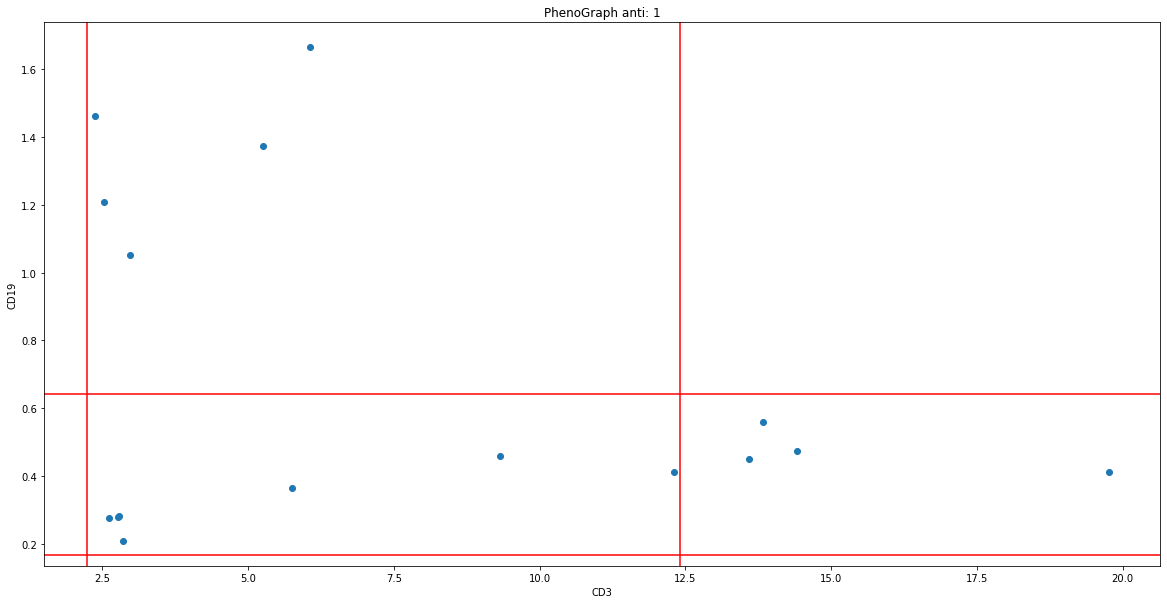

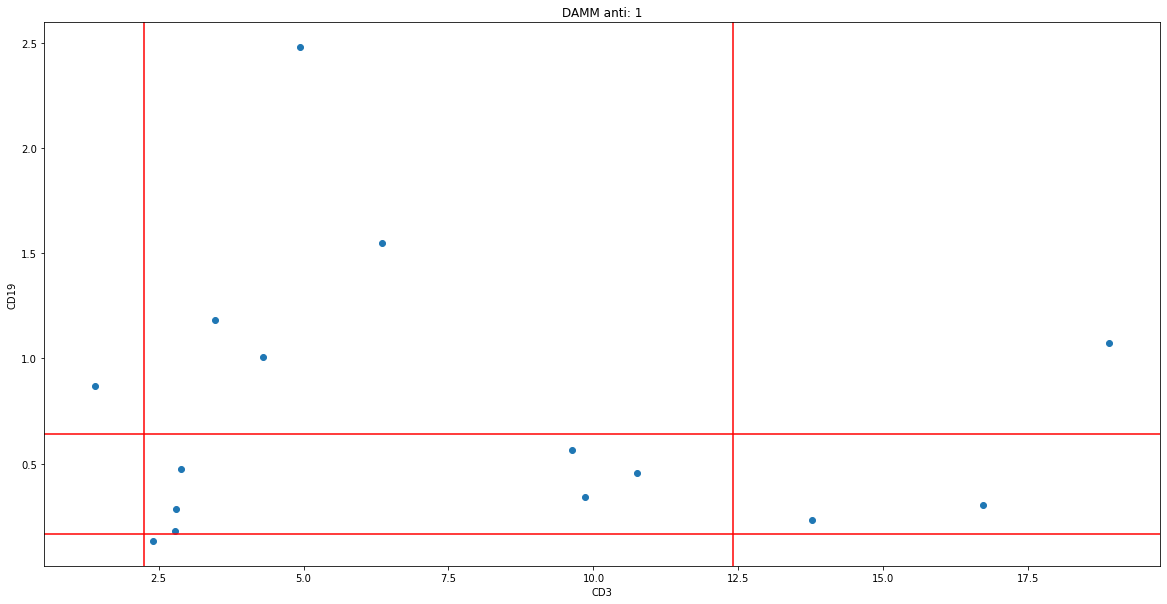

CD3_CD68 -- PG: 0.0; DAMM: 0.06666666666666667


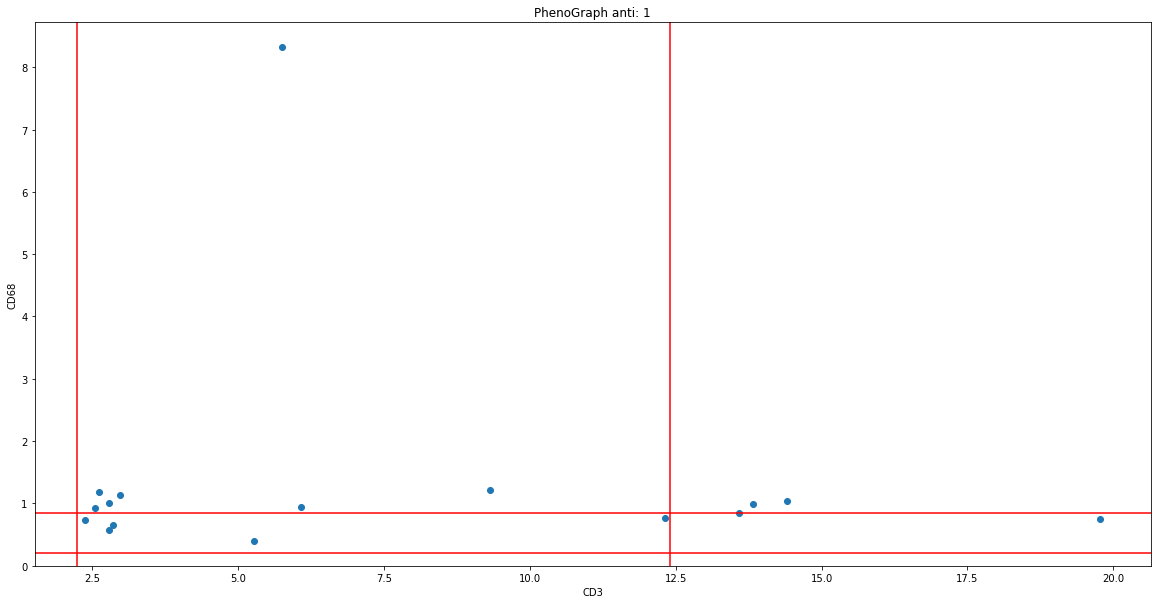

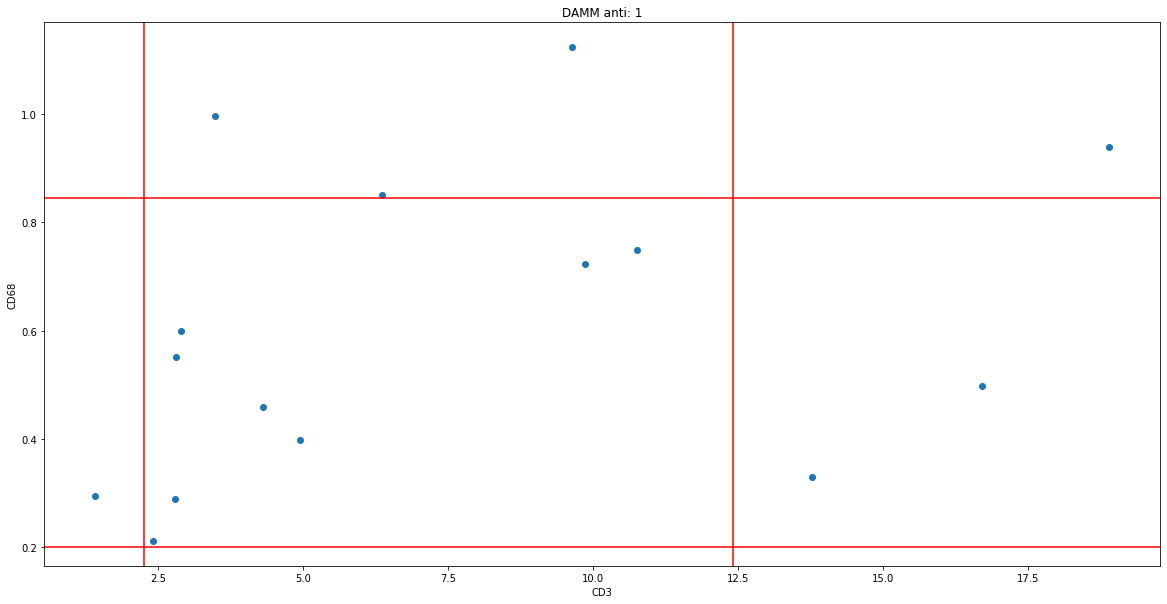

CD4_CD8 -- PG: 0.125; DAMM: 0.26666666666666666


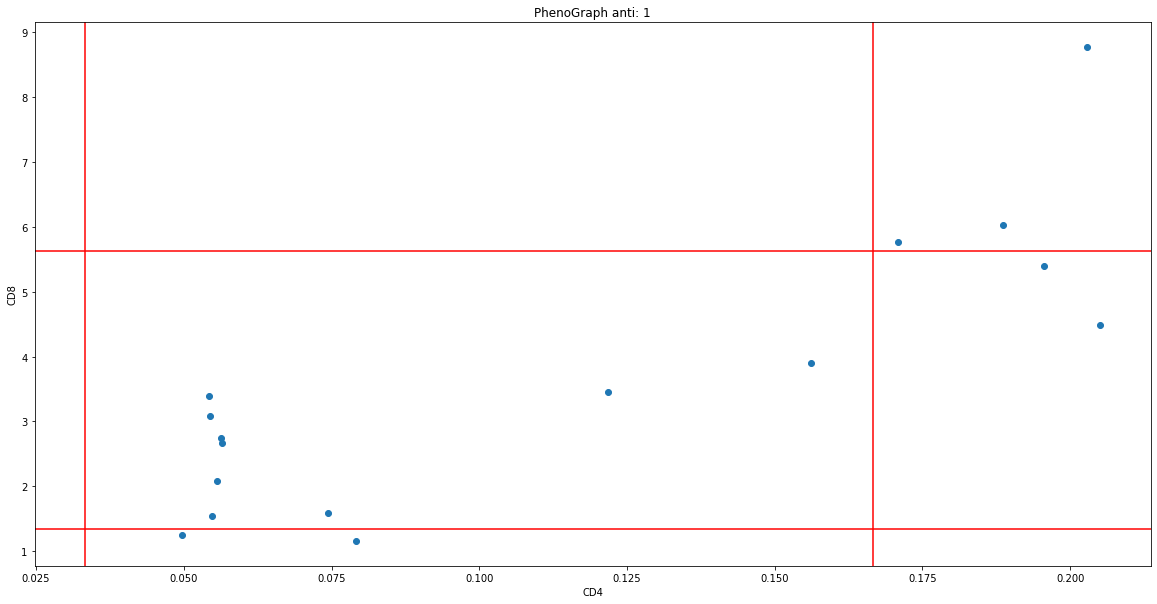

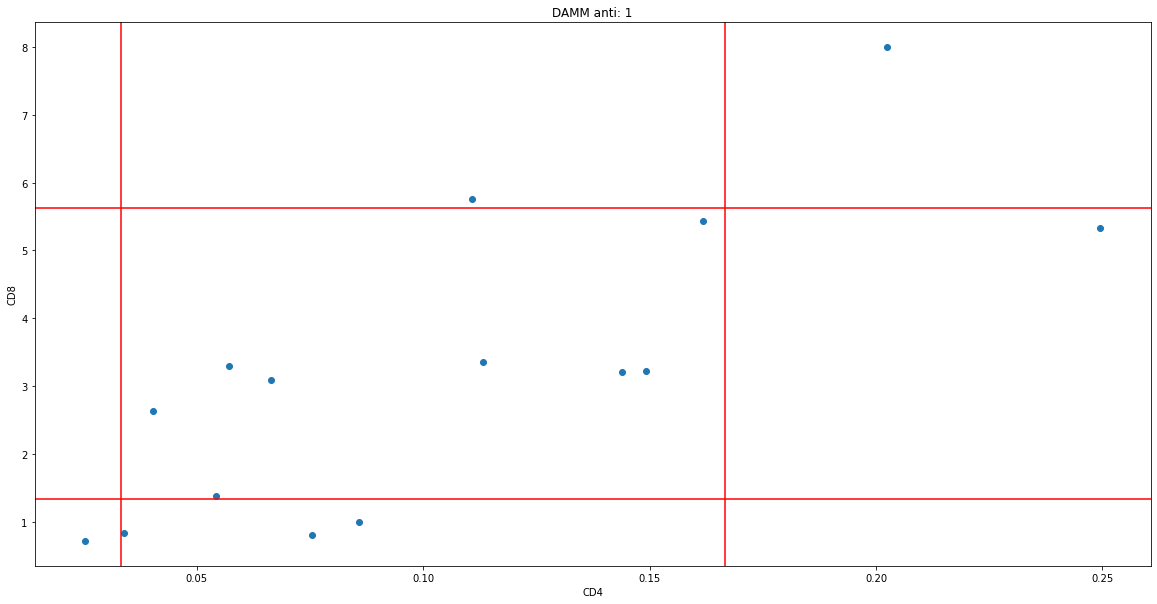

CD4_CD19 -- PG: 0.0; DAMM: 0.13333333333333333


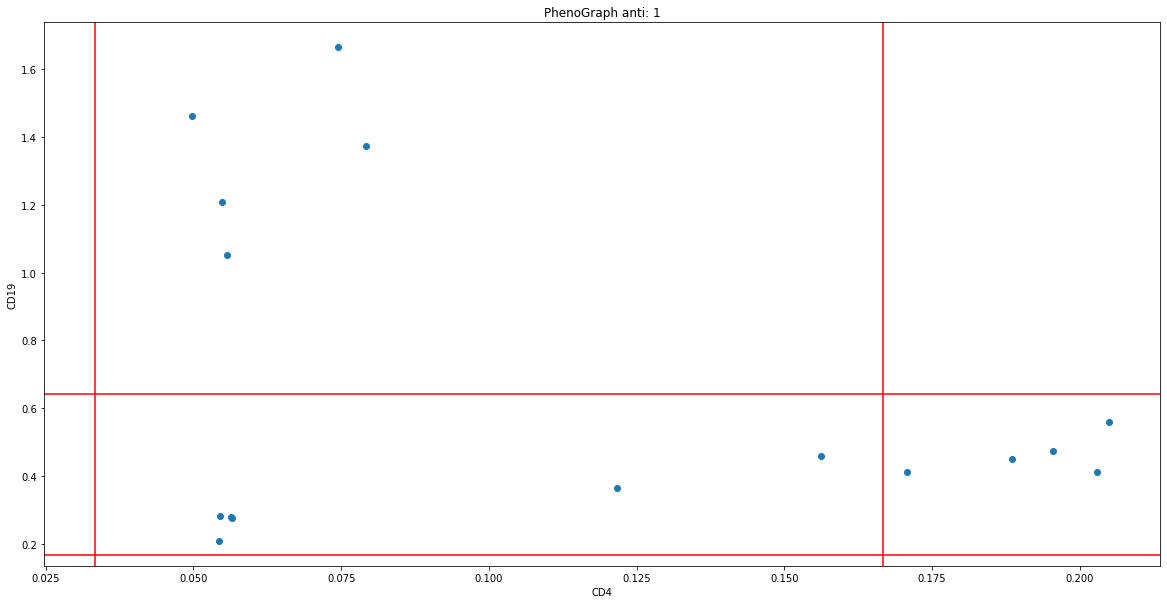

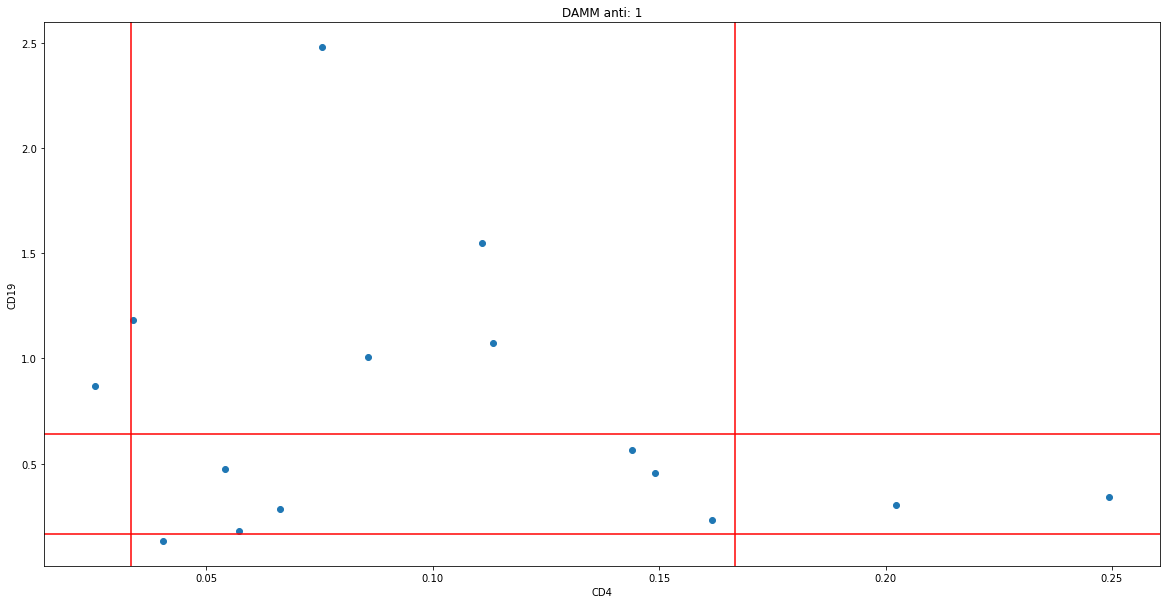

CD4_CD68 -- PG: 0.0; DAMM: 0.06666666666666667


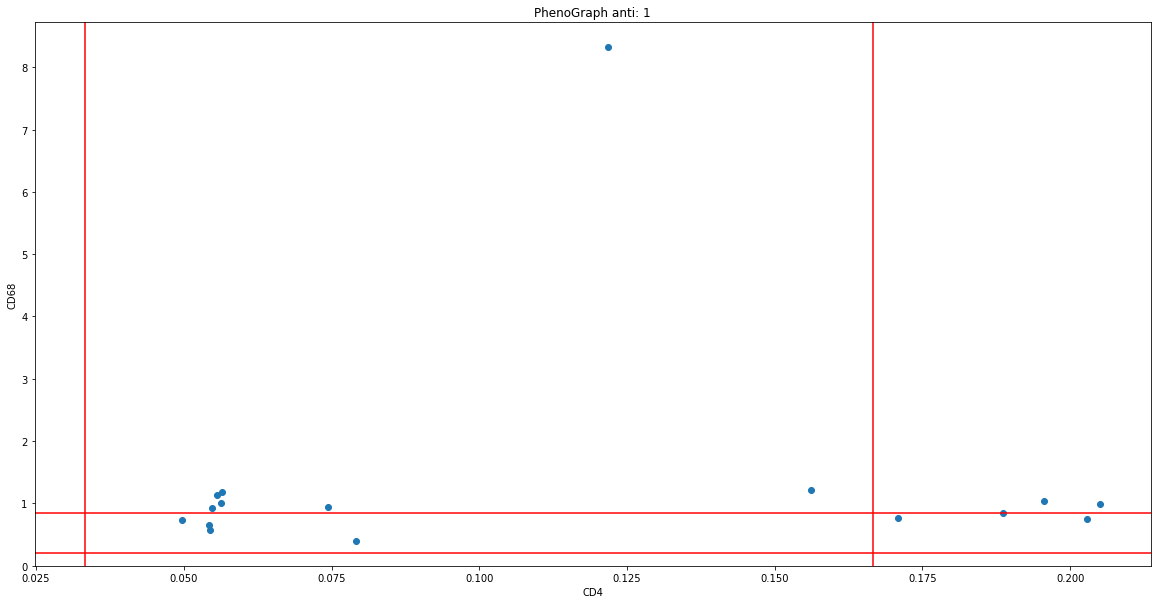

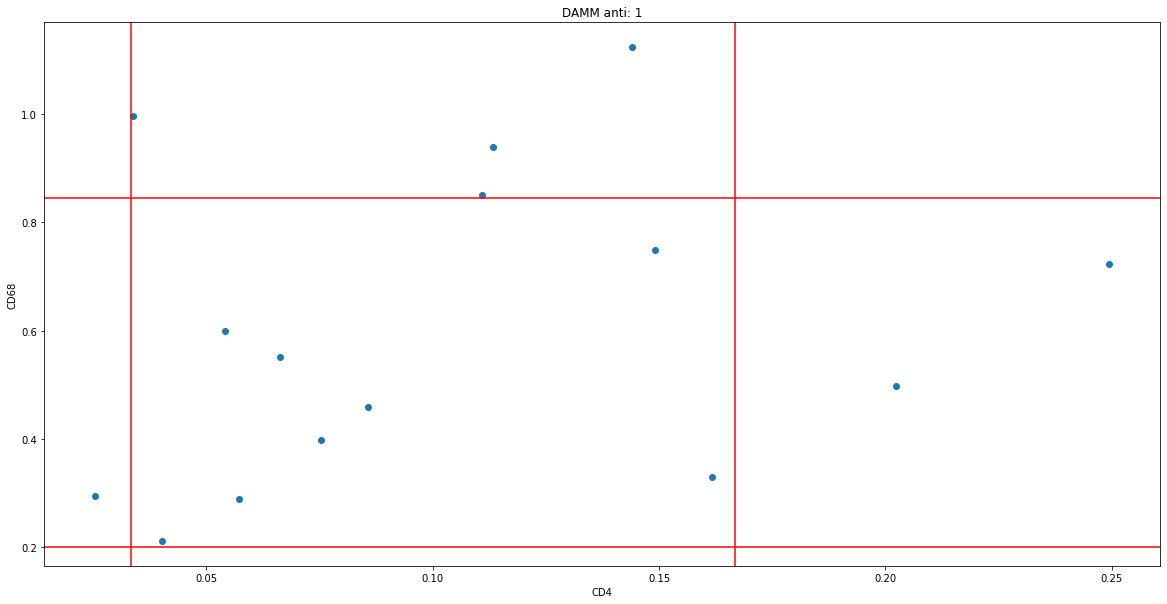

CD8_CD11b -- PG: 0.125; DAMM: 0.26666666666666666


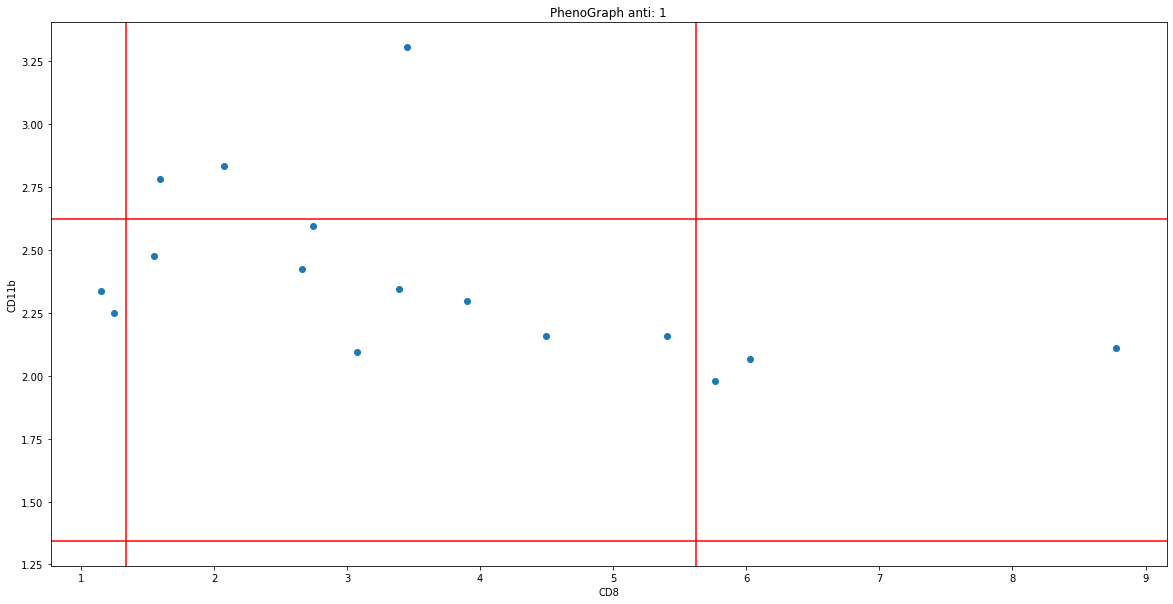

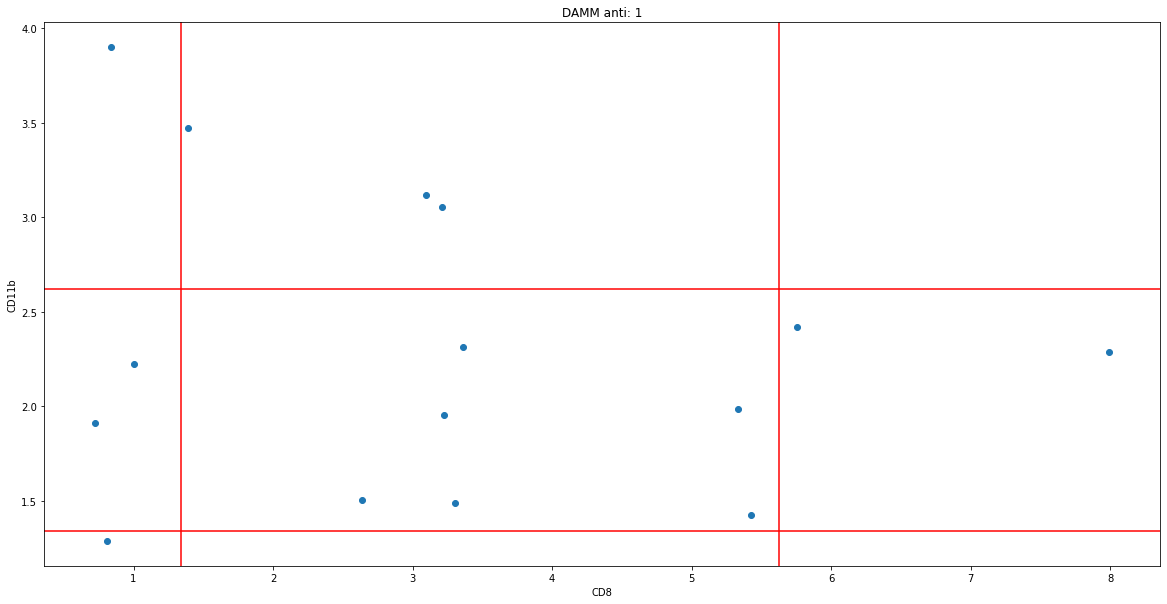

CD8_CD19 -- PG: 0.125; DAMM: 0.3333333333333333


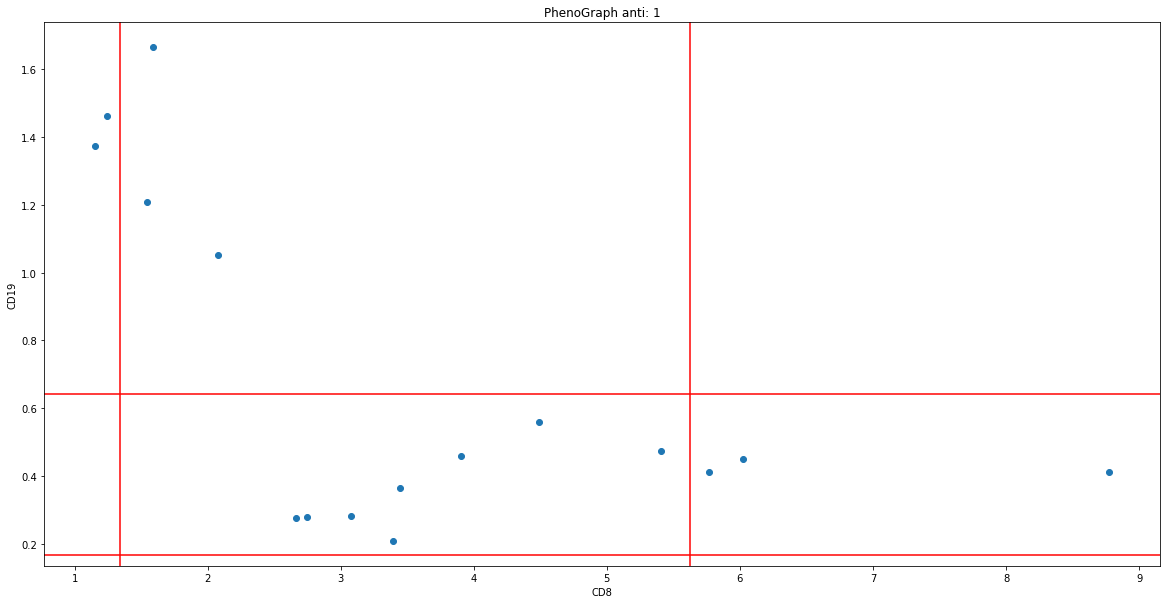

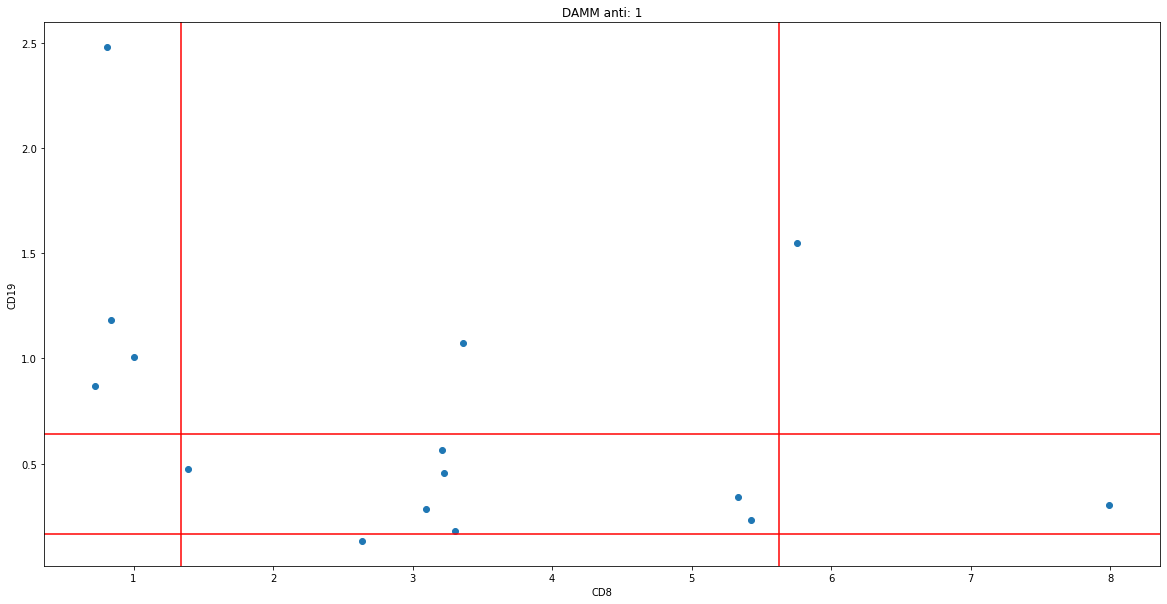

CD8_CD68 -- PG: 0.125; DAMM: 0.26666666666666666


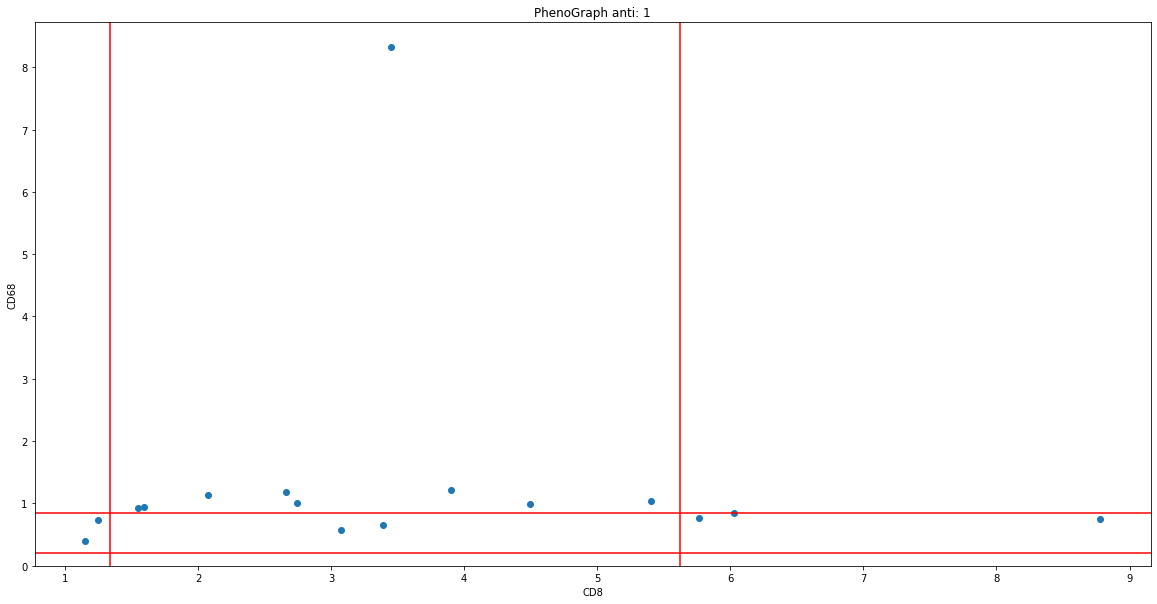

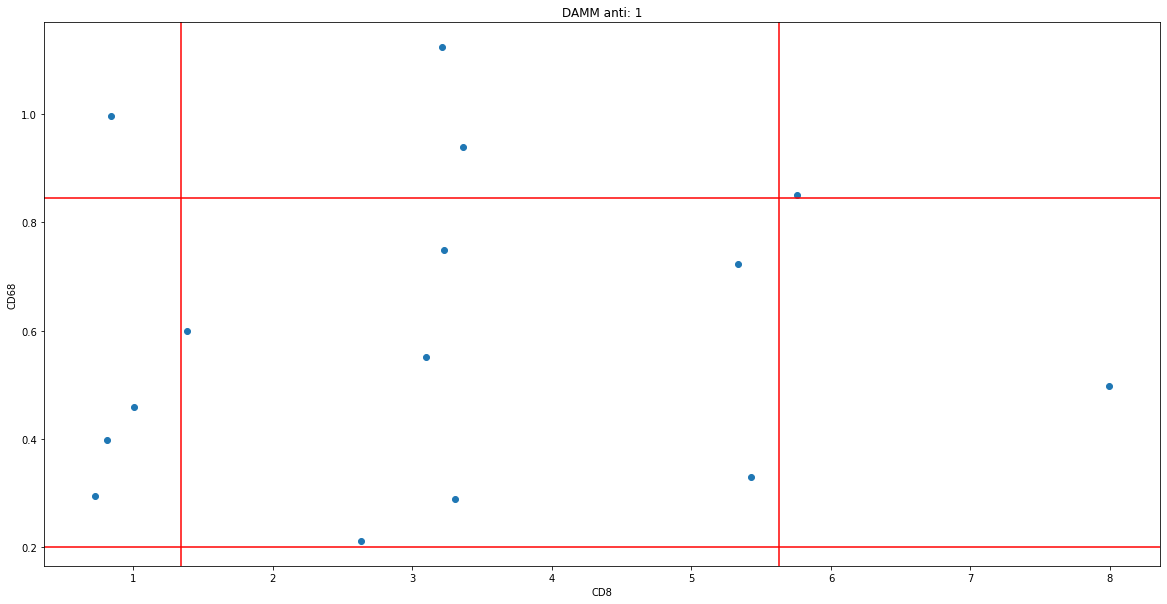

CD19_CD68 -- PG: 0.0; DAMM: 0.06666666666666667


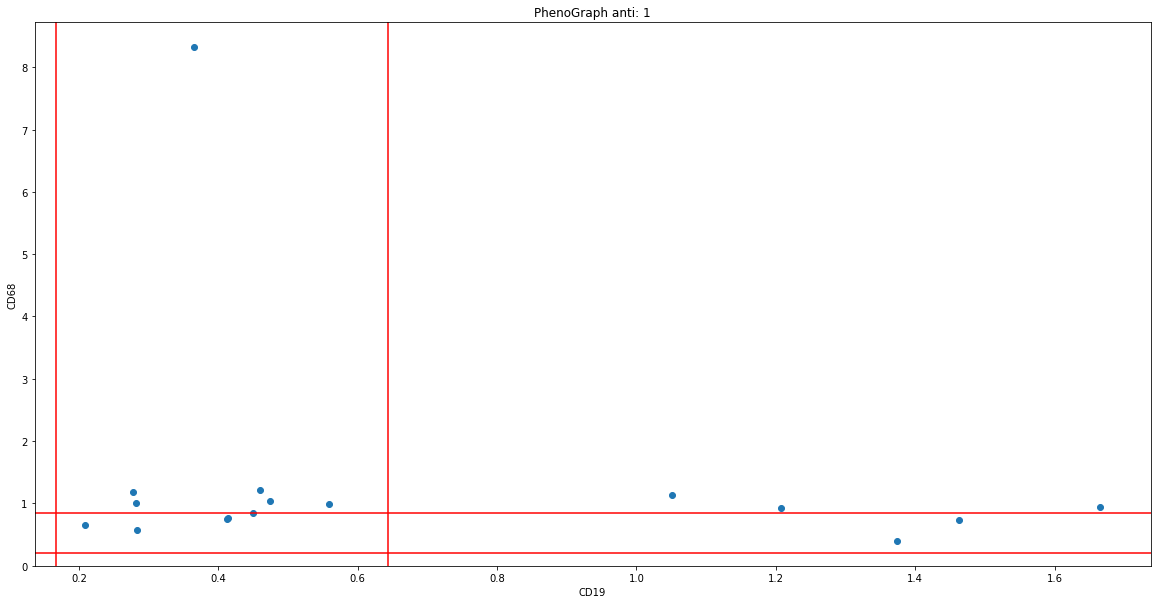

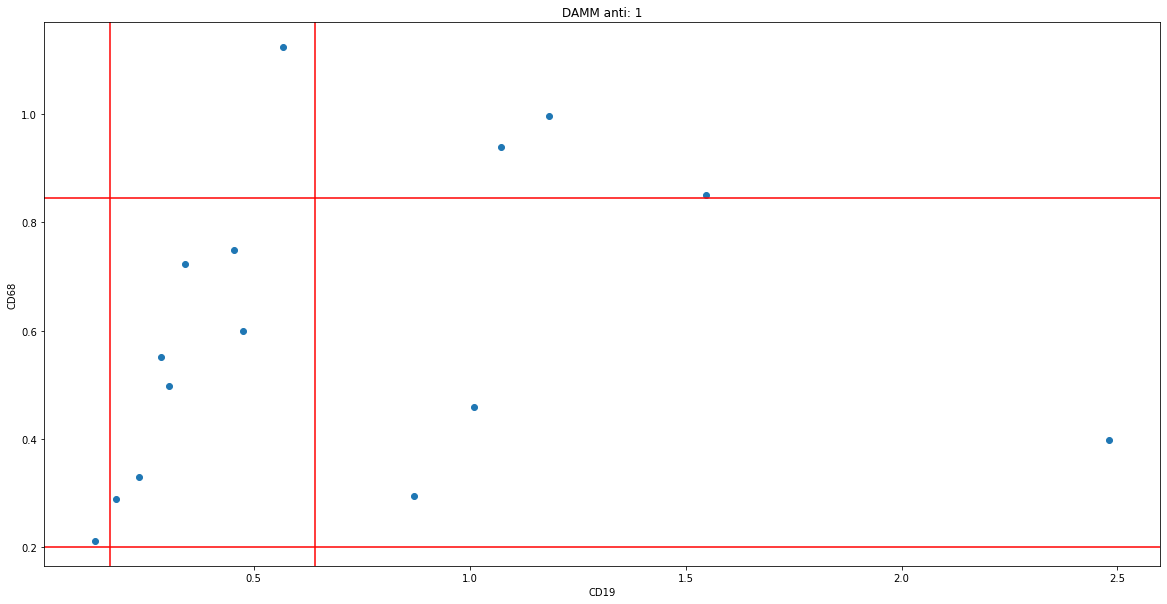

CD3_CD4 -- PG: 0.25; DAMM: 0.26666666666666666


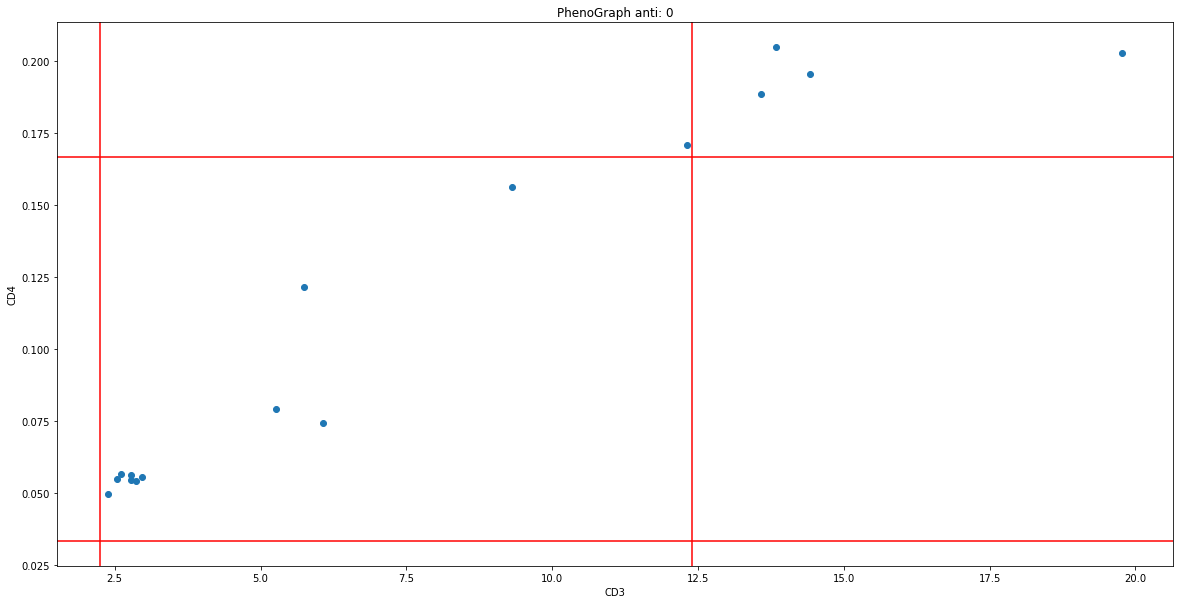

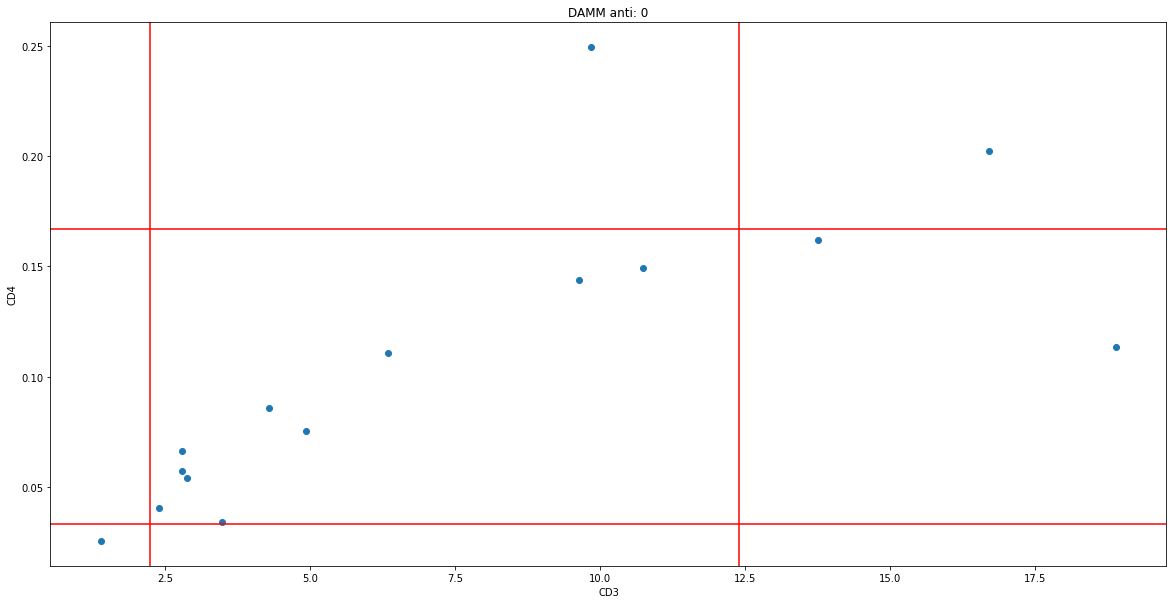

CD3_CD8 -- PG: 0.375; DAMM: 0.4666666666666667


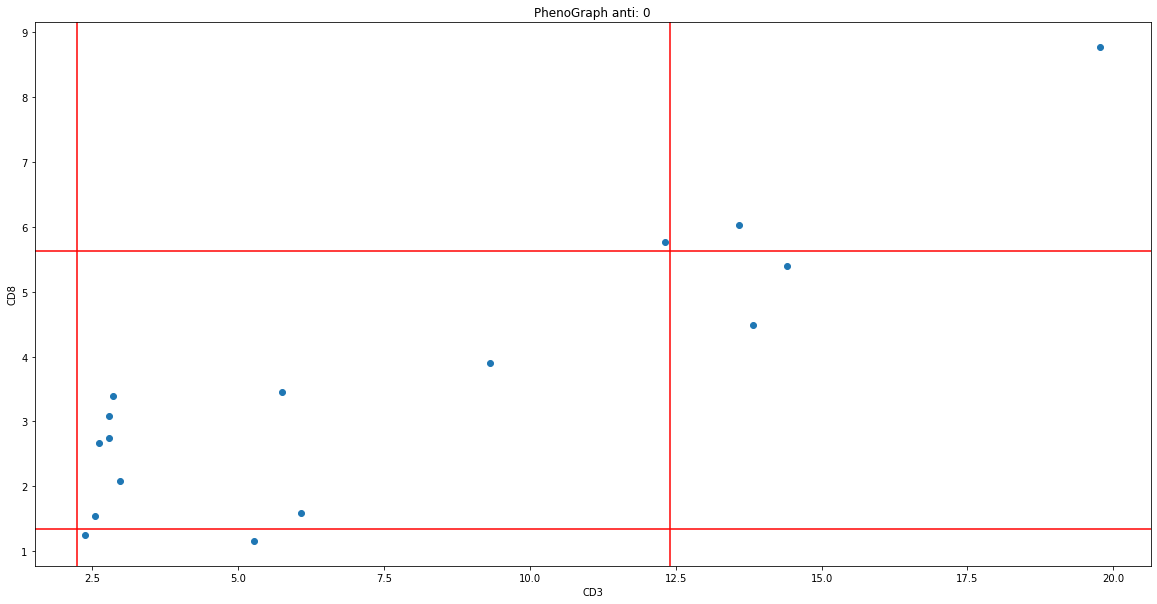

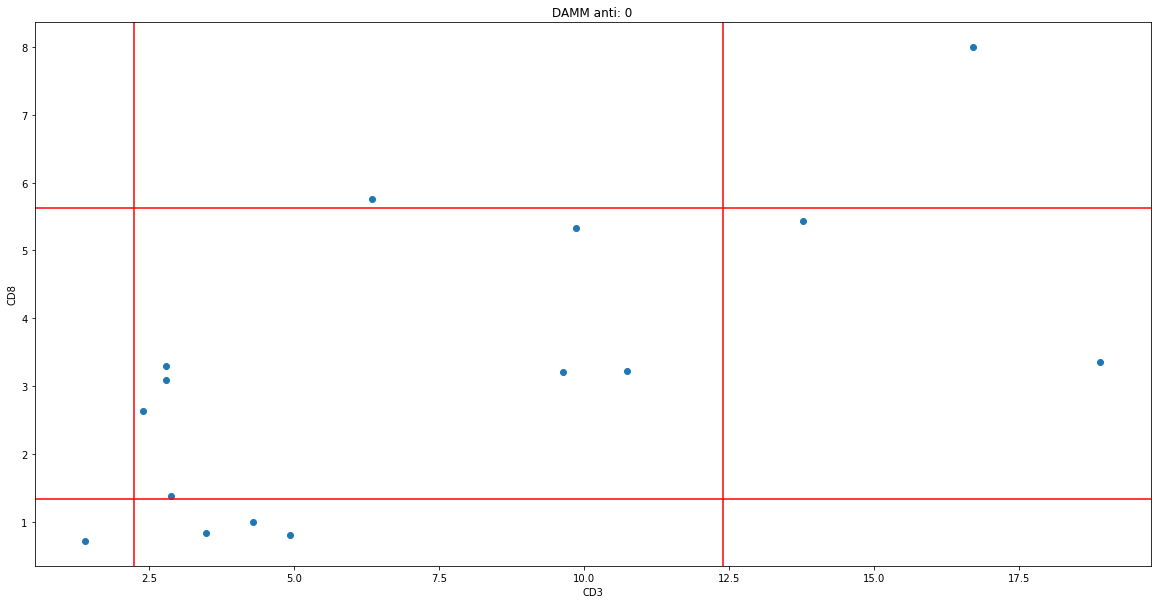

CD45_CD3 -- PG: 0.0625; DAMM: 0.26666666666666666


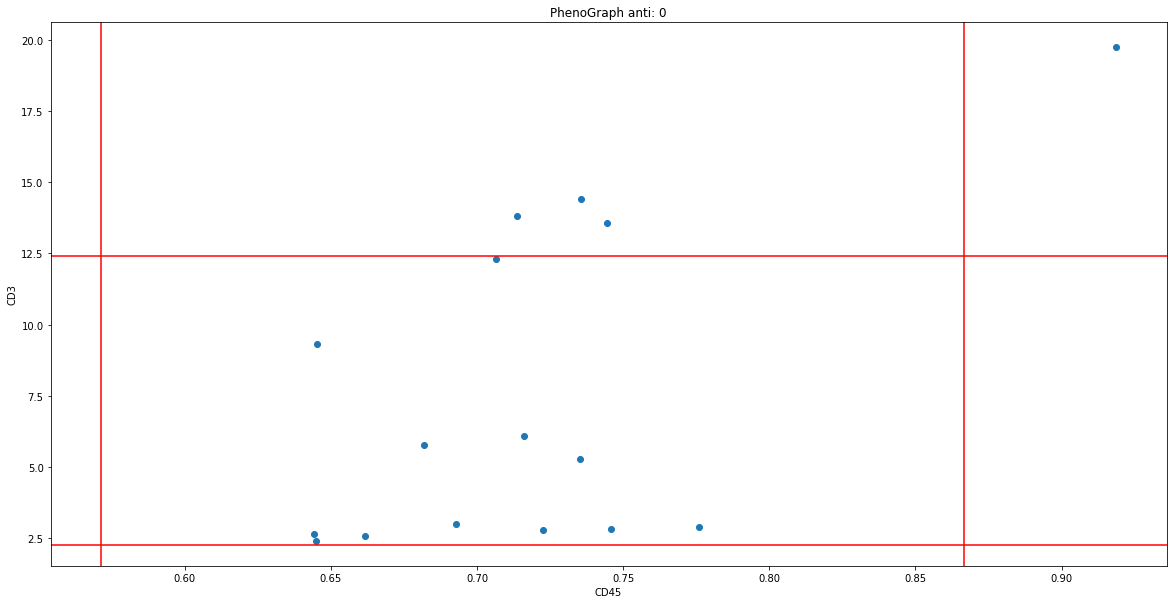

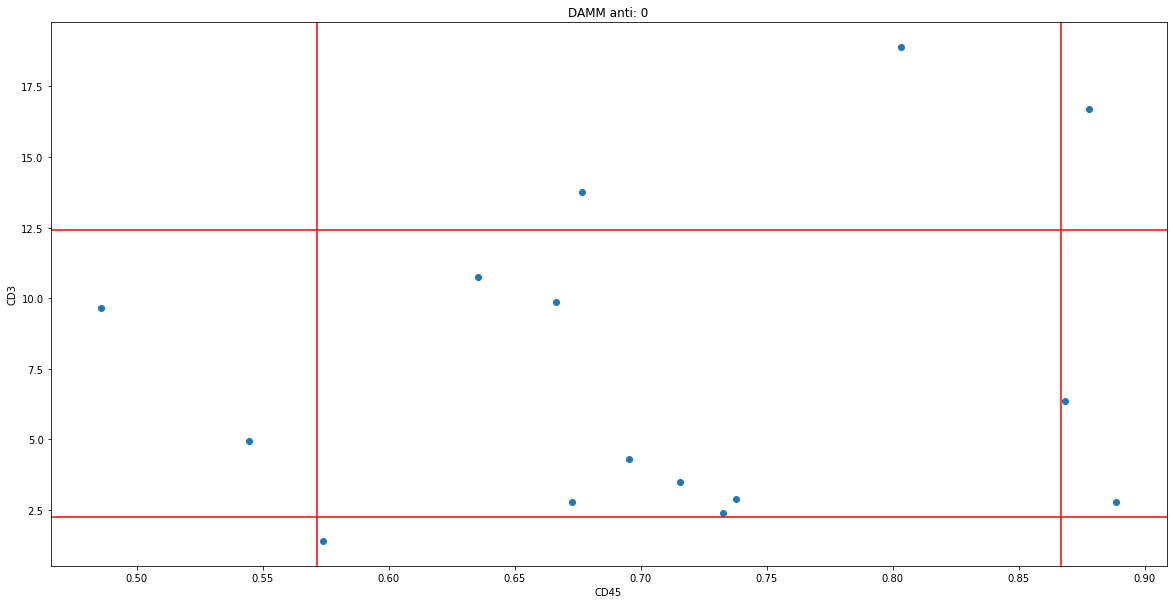

CD45_CD4 -- PG: 0.0625; DAMM: 0.26666666666666666


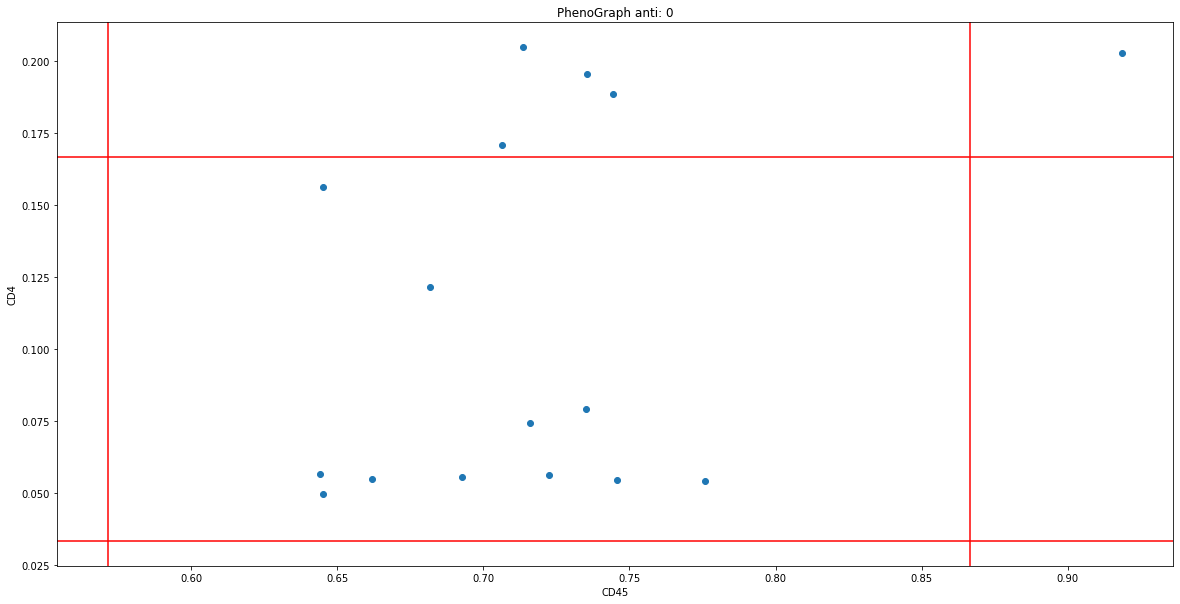

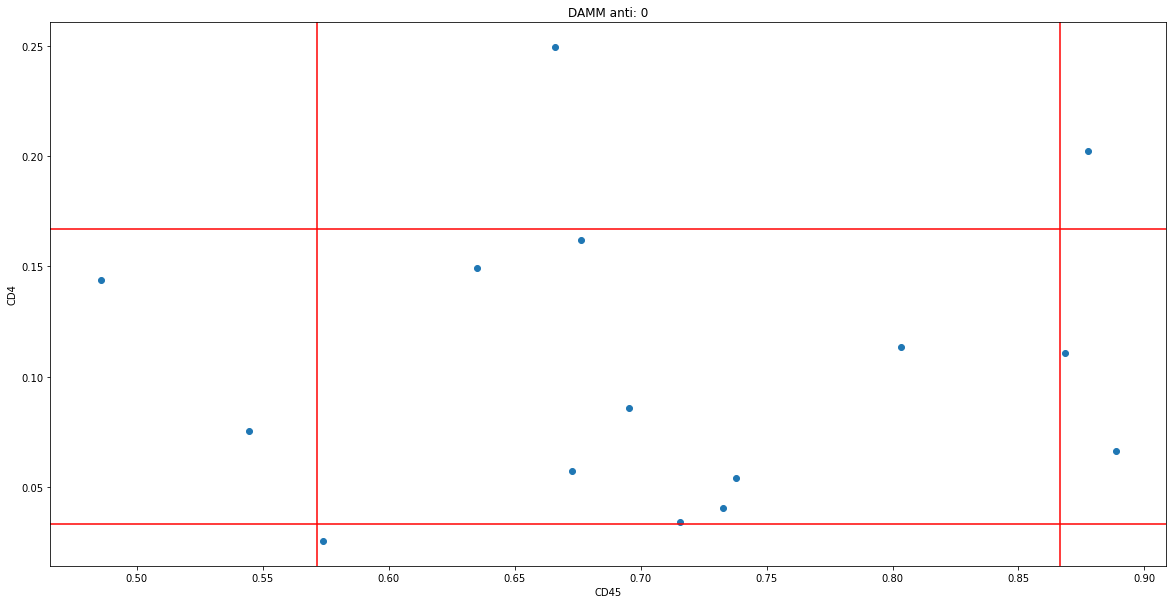

CD45_CD8 -- PG: 0.1875; DAMM: 0.4666666666666667


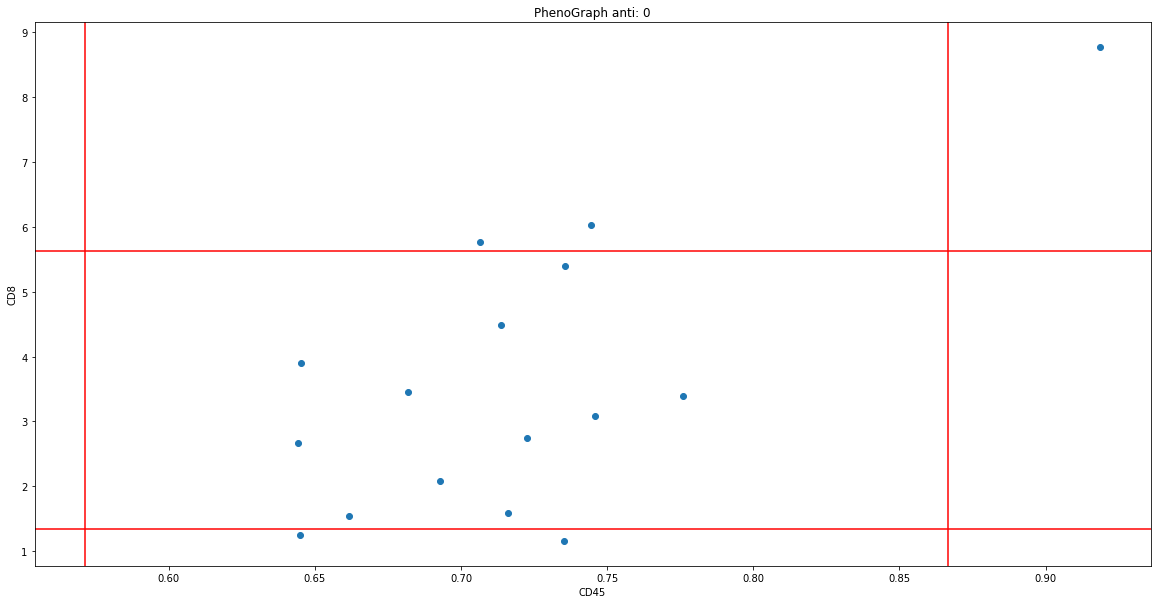

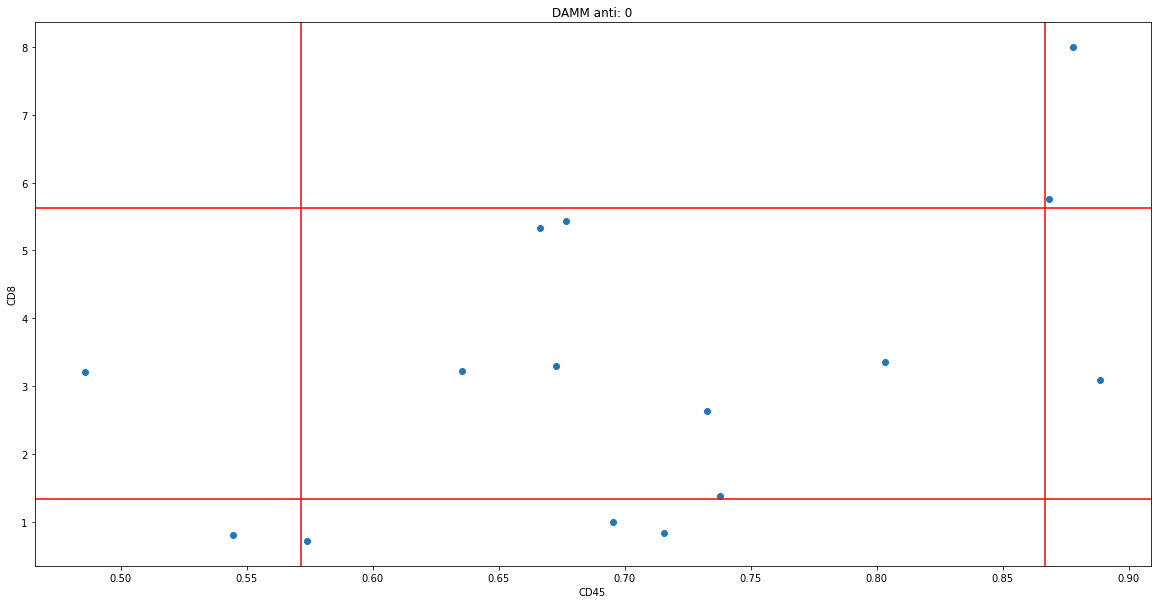

CD45_CD19 -- PG: 0.0625; DAMM: 0.26666666666666666


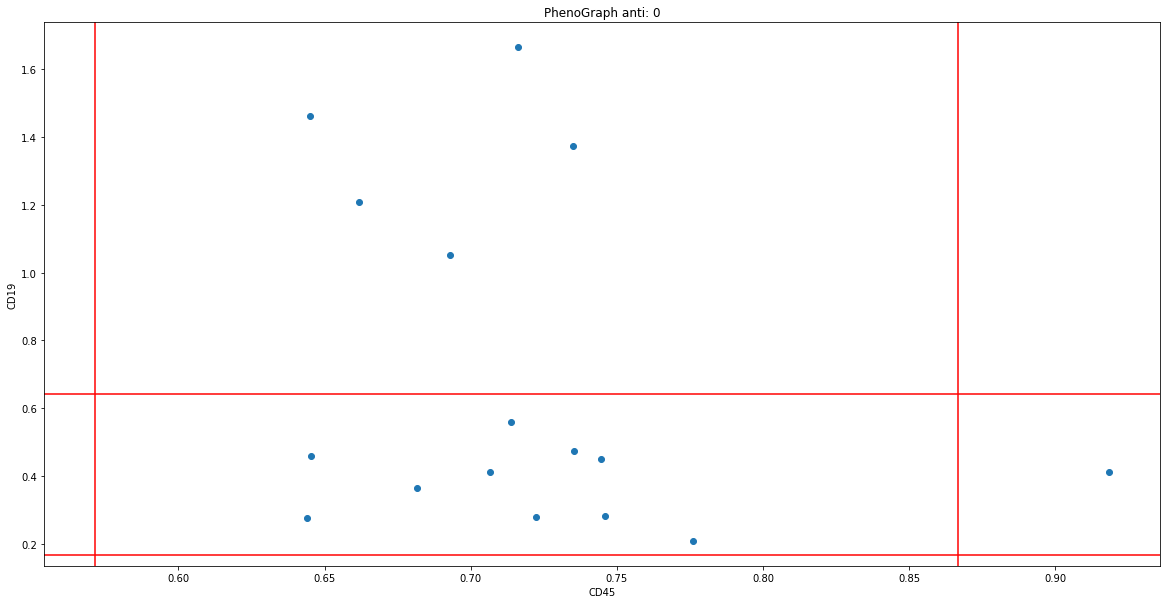

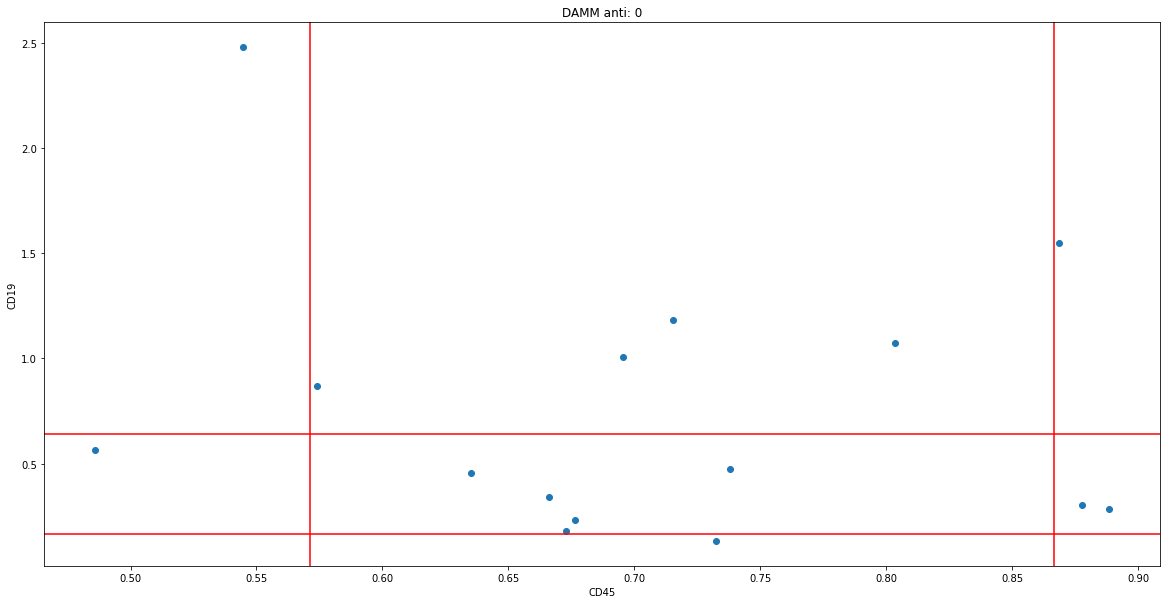

CD45_CD68 -- PG: 0.0625; DAMM: 0.2


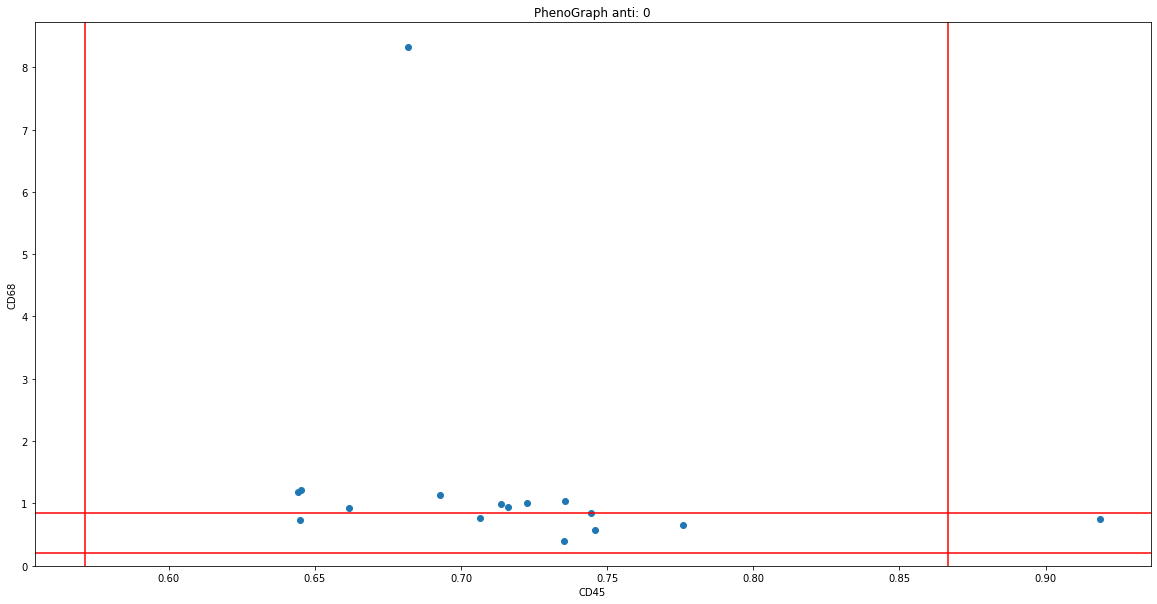

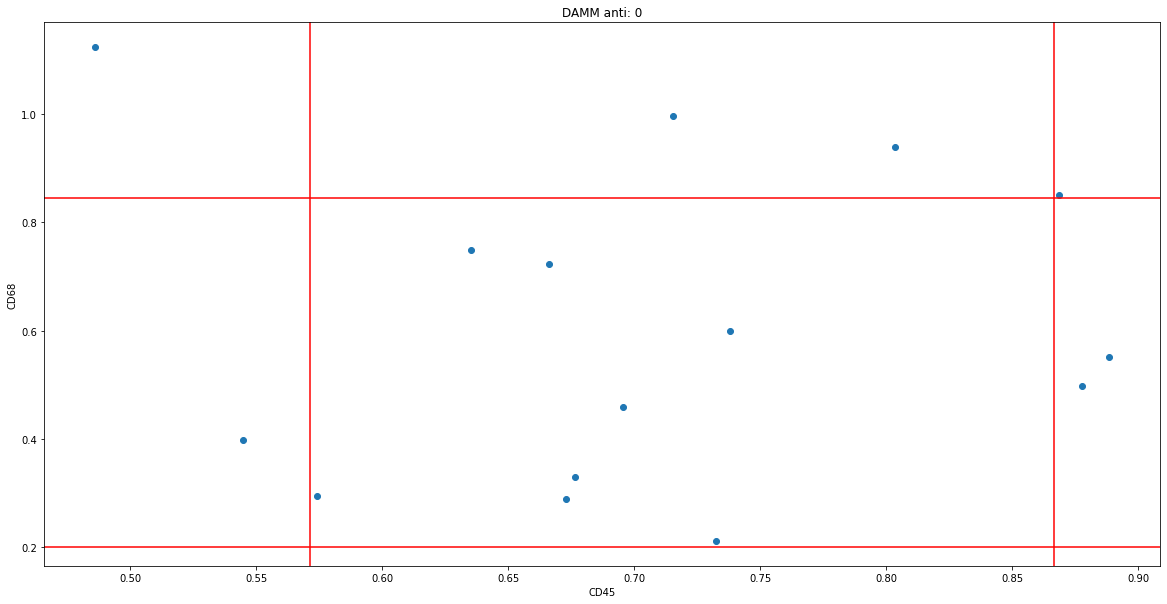

In [59]:
anti = newMetric2(pheno_mat, damm_mat, 1, anti_pairs, thresholds)
co = newMetric2(pheno_mat, damm_mat, 0, co_pairs, thresholds)
df = pd.concat([anti, co])

Text(0.5, 0.98, 'Eddy: Correlation Alternative')

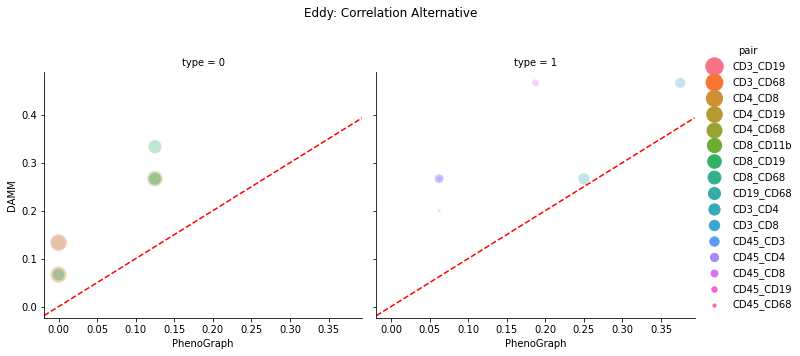

In [47]:
rel = sns.relplot(data=df, x='PhenoGraph', y='DAMM', col='type', hue='pair', size="pair", sizes=(10, 300), alpha = 0.3)
#rel = sns.relplot(data=df, x='PhenoGraph', y='DAMM', col='type', hue='pair')
for ax in rel.axes_dict.values():
    ax.axline((0, 0), slope=1, ls="--", color ='red')
rel.data = df  # Hack needed to work around bug on v0.11, fixed in v0.12.dev
#rel.map(sns.lineplot, 'PhenoGraph', 'DAMM')
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle('Eddy: Correlation Alternative')

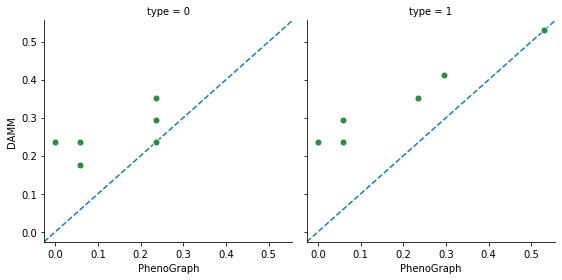

In [50]:
#g = sns.FacetGrid(df, col="type", margin_titles=True, height=4)
#g.map(plt.scatter, 'PhenoGraph', 'DAMM', color="#338844", edgecolor="white", s=50, lw=1)
#for ax in g.axes_dict.values():
#    ax.axline((0, 0), slope=1, ls="--", zorder=0)